# **Proyecto I- Parte IV (Core)**

Análisis y Predicción de Ventas en una Tienda de Retail



## Parte IV: Análisis Exploratorio de Datos (EDA) y Visualización

En esta cuarta parte del proyecto, aplicaremos técnicas avanzadas de análisis exploratorio de datos (EDA) y visualización para comprender mejor el conjunto de datos de ventas de la tienda de retail. Utilizaremos Python, Pandas y Matplotlib para explorar y visualizar los datos, identificar patrones y tendencias, y preparar los datos para un análisis más profundo.

# ***1) Continuar desde la Parte III***

Asegúrate de tener el repositorio de GitHub clonado localmente y el dataset ya limpiado y preparado desde la Parte III.

- Instalación de pandas.
- Carga de datos del proyecto 1 parte 3.
- Revisar valores únicos y conteo de estos, para revisar qué graficar y analizar, además ya los datos no presentaban nulos o errores o faltantes

In [121]:
import pandas as pd

df = pd.read_csv('/content/retail_sales_dataset_project_1_part_4.csv')
print(df.info(),'\n')

for column in df.columns:
    print(f"\nConteo de valores únicos en la columna '{column}':")
    print(df[column].value_counts().sort_index())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Transaction ID        1000 non-null   int64  
 1   Date                  1000 non-null   object 
 2   Customer ID           1000 non-null   object 
 3   Gender                1000 non-null   object 
 4   Age                   1000 non-null   int64  
 5   Product Category      1000 non-null   object 
 6   Quantity              1000 non-null   int64  
 7   Price per Unit        1000 non-null   int64  
 8   Total Sales           1000 non-null   int64  
 9   n_Total Sales         1000 non-null   float64
 10  Sales Classification  1000 non-null   object 
 11  Month Number          1000 non-null   int64  
 12  Month Name            1000 non-null   object 
dtypes: float64(1), int64(6), object(6)
memory usage: 101.7+ KB
None 


Conteo de valores únicos en la columna 'Transaction ID':


## Info del dataset directamente de Kaggle
Este conjunto de datos es una instantánea de un paisaje minorista ficticio, que captura atributos esenciales que impulsan las operaciones minoristas y las interacciones con los clientes. Incluye detalles clave como ID de transacción, fecha, ID de cliente, sexo, edad, categoría de producto, cantidad, precio por unidad e importe total. Estos atributos permiten una exploración multifacética de las tendencias de ventas, las influencias demográficas y los comportamientos de compra.


Representación realista: Aunque sintético, el conjunto de datos refleja escenarios reales del comercio minorista, lo que le permite practicar el análisis en un contexto familiar.

Información diversa: Desde perspectivas demográficas hasta preferencias de productos, el conjunto de datos ofrece un amplio espectro de factores para investigar.

Generación de hipótesis: A medida que realice EDA, tendrá la oportunidad de formular hipótesis que pueden guiar el análisis y la experimentación posteriores.

Aprendizaje aplicado: Descubra información práctica que los minoristas podrían utilizar para mejorar sus estrategias y la experiencia de sus clientes.



Preguntas para explorar:

- ¿Cómo influyen la edad y el sexo de los clientes en su comportamiento de compra?
- ¿Existen patrones discernibles en las ventas a lo largo de diferentes periodos de tiempo?
- ¿Qué categorías de productos atraen más a los clientes?
- ¿Qué relación existe entre la edad, el gasto y las preferencias de producto?
- ¿Cómo adaptan los clientes sus hábitos de compra a las tendencias estacionales?
- ¿Existen comportamientos de compra distintos en función del número de artículos comprados por transacción?
- ¿Qué conclusiones pueden extraerse de la distribución de los precios de los productos dentro de cada categoría?


# **2) Análisis Descriptivo y Visualización**





## a) Calcula estadísticas descriptivas básicas para comprender mejor las características de los datos.

In [122]:
df.describe().round(2)

,Transaction ID,Age,Quantity,Price per Unit,Total Sales,n_Total Sales,Month Number
count,1000.00,1000.00,1000.00,1000.00,1000.0,1000.00,1000.00
mean,500.50,41.39,2.51,179.89,456.0,0.22,6.55
std,288.82,13.68,1.13,189.68,560.0,0.28,3.45
min,1.00,18.00,1.00,25.00,25.0,0.00,1.00
25%,250.75,29.00,1.00,30.00,60.0,0.02,4.00
50%,500.50,42.00,3.00,50.00,135.0,0.06,6.00
75%,750.25,53.00,4.00,300.00,900.0,0.44,10.00
max,1000.00,64.00,4.00,500.00,2000.0,1.00,12.00


### *Análisis*
1. Rango de edad va de 18 a 64 años ¿Habrá diferencias de edad y tendencia de compra? ¿Y si en vez de edad, mirar género? ¿O los tres?
2. ¿Cantidad y precio unitario me dan algún tipo de información si grafico algo?
3. Ventas totales va de 25 a 2000, este si debería revisarse con un histograma y un boxplot

## b) Utiliza histogramas y boxplots para visualizar la distribución de las variables numéricas clave.

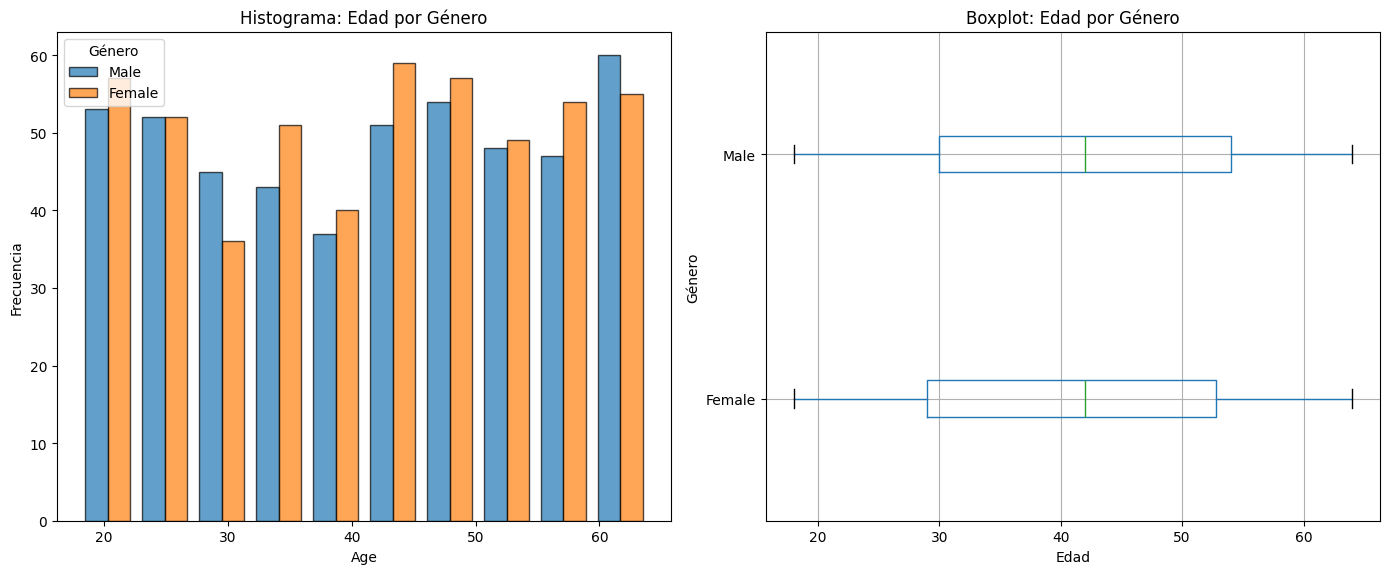

In [124]:
# Crear subgráficos
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Histograma por Género y Edad
# Asegúrate de que df['Gender'] tiene categorías como 'Male' y 'Female'
axes[0].hist([df[df['Gender'] == 'Male']['Age'], df[df['Gender'] == 'Female']['Age']],
             bins=10, edgecolor='black', alpha=0.7, label=['Male', 'Female'])
axes[0].set_title("Histograma: Edad por Género")
axes[0].set_xlabel("Age")
axes[0].set_ylabel("Frecuencia")
axes[0].legend(title="Género")

# Boxplot por Género y Edad
# Asegúrate de que df['Total_Ventas'] es una columna válida
df.boxplot(column='Age', by='Gender', vert=False, ax=axes[1])
axes[1].set_title("Boxplot: Edad por Género")
axes[1].set_xlabel("Edad")
axes[1].set_ylabel("Género")

# Eliminar el título automático generado por 'by'
plt.suptitle('')  # Eliminar el título por defecto generado por pandas

# Ajustar automáticamente el espaciado entre subplots
plt.tight_layout()

# Mostrar la figura
plt.show()


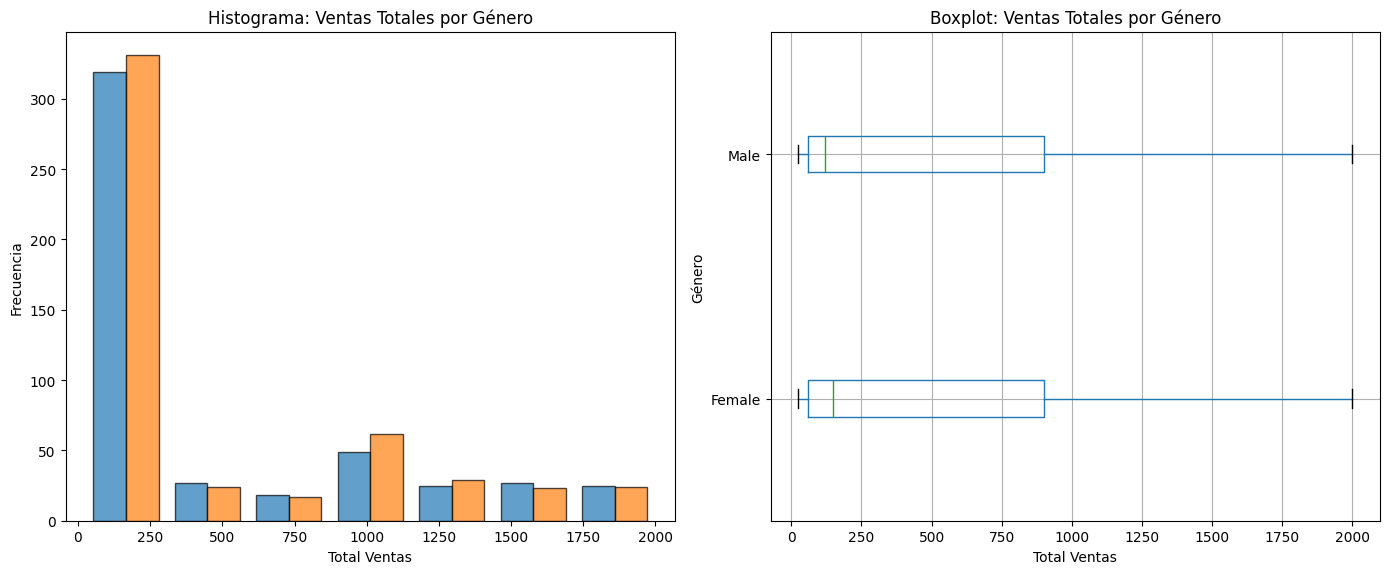

In [135]:
# Crear subgráficos
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Histograma de Ventas Totales
axes[0].hist([df[df['Gender'] == 'Male']['Total Sales'], df[df['Gender'] == 'Female']['Total Sales']],
             bins=7, edgecolor='black', alpha=0.7, label=['Male', 'Female'])
axes[0].set_title("Histograma: Ventas Totales por Género")
axes[0].set_xlabel("Total Ventas")
axes[0].set_ylabel("Frecuencia")
# Se debio ajustar bins para poder mostrar una frecuencia y no quedaran espacios "vacíos"

# Boxplot de Ventas Totales por Género
df.boxplot(column='Total Sales', by='Gender', vert=False, ax=axes[1])
axes[1].set_title("Boxplot: Ventas Totales por Género")
axes[1].set_xlabel("Total Ventas")
axes[1].set_ylabel("Género")

# Eliminar el título automático generado por 'by'
plt.suptitle('')  # Eliminar el título por defecto generado por pandas

# Ajustar automáticamente el espaciado entre subplots
plt.tight_layout()

# Mostrar la figura
plt.show()


### *Análisis*
1. En cuanto a la edad, parece que ambos géneros están representados en todo el espectro de la variable edad, ya que los boxplot son bastante similares,
2. La mayor concentración de las ventas está por debajo de los 250 dólares (suponiendo que estos datos son dólares), y aquí es indiferente el género, ya que ambos boxplot dan similares, y hasta las barras de frecuencia en el histograma son muy parejas… Otro pico de alta frecuencia de ventas se ve alrededor de los 1.000 dólares. En este histograma tocó cambiar el bins a 7 para no obtener “espacios vacíos” ya que esto indicaría que la frecuencia no estaría siendo bien representada


## c) Crea gráficos de líneas para mostrar las tendencias de ventas a lo largo del tiempo.


Text(0, 0.5, 'Ventas Totales')

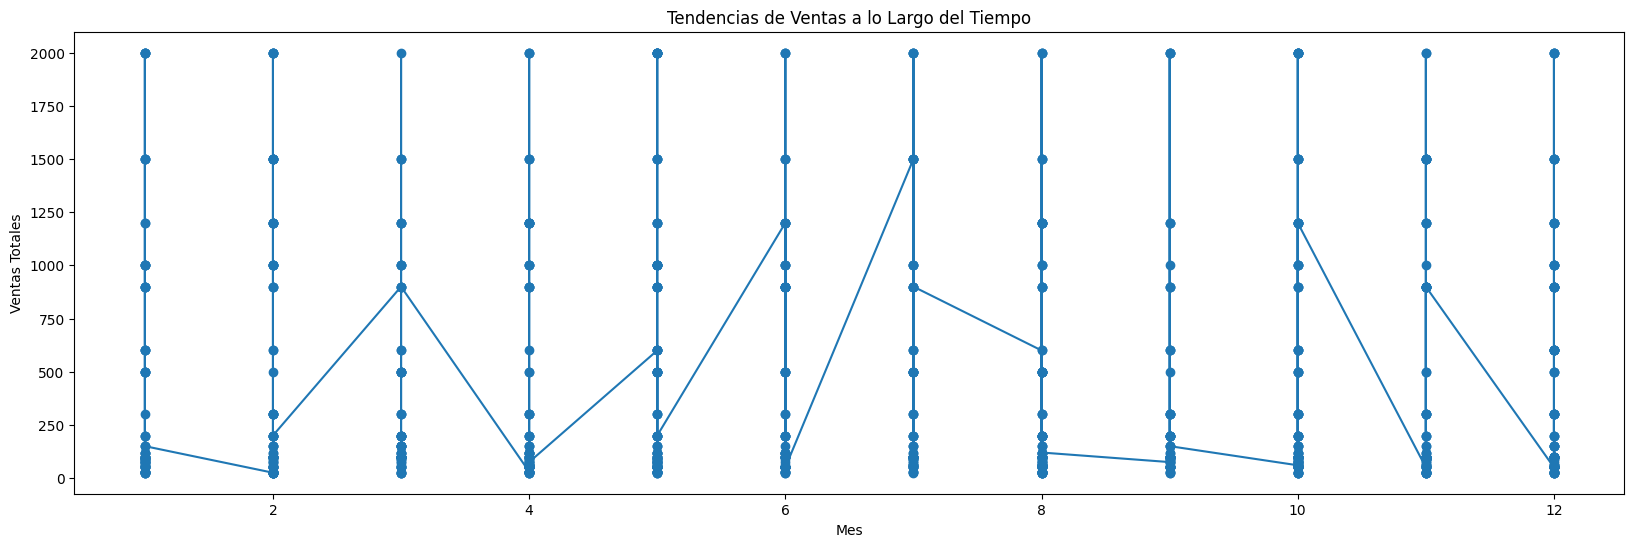

In [136]:
# Se creo este gráfico con Date y Month Number, como grafica puntos, como si fuera dispersión, pero con una línea, ninguno de los dos es claros
plt.figure(figsize=(20, 6))
plt.plot('Month Number', 'Total Sales', data=df, marker='o', linestyle='-')
plt.title('Tendencias de Ventas a lo Largo del Tiempo')
plt.xlabel('Mes')
plt.ylabel('Ventas Totales')

# Hay que generar agrupaciones para poder graficar

<ipython-input-137-65f2dcceac86>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_sales_sum = df.groupby('Month Name')['Total Sales'].sum().reindex(month_order)
<ipython-input-137-65f2dcceac86>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_sales_mean = df.groupby('Month Name')['Total Sales'].mean().reindex(month_order)


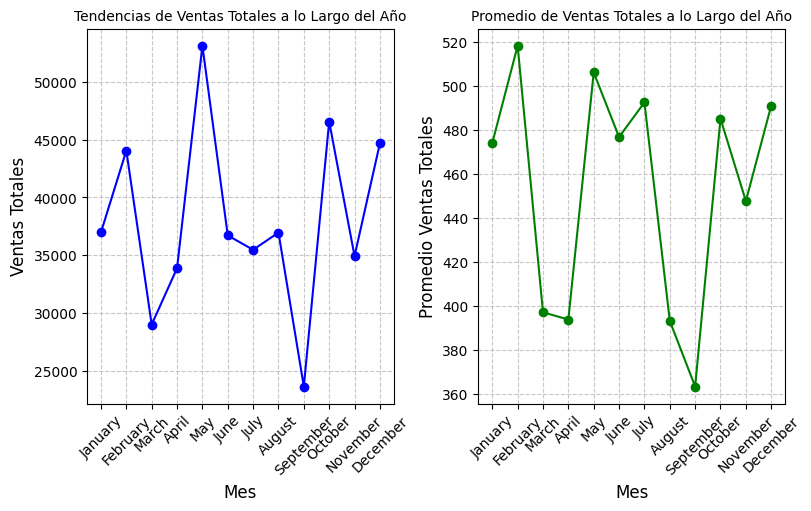

In [137]:
# Asegurarnos de que los meses están ordenados correctamente
month_order = ["January", "February", "March", "April", "May", "June",
               "July", "August", "September", "October", "November", "December"]
df['Month Name'] = pd.Categorical(df['Month Name'], categories=month_order, ordered=True)

# Agrupar y, sumar o promediar ventas totales por mes
monthly_sales_sum = df.groupby('Month Name')['Total Sales'].sum().reindex(month_order)
monthly_sales_mean = df.groupby('Month Name')['Total Sales'].mean().reindex(month_order)

# Crear subgráficos
fig, axes = plt.subplots(1, 2, figsize=(8, 5), constrained_layout=True)

# Gráfico de tendencias de ventas totales
axes[0].plot(monthly_sales_sum.index, monthly_sales_sum.values, marker='o', linestyle='-', color='blue')
axes[0].set_title("Tendencias de Ventas Totales a lo Largo del Año", fontsize=10)
axes[0].set_xlabel("Mes", fontsize=12)
axes[0].set_ylabel("Ventas Totales", fontsize=12)
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True, linestyle='--', alpha=0.7)

# Gráfico de promedios de ventas totales
axes[1].plot(monthly_sales_mean.index, monthly_sales_mean.values, marker='o', linestyle='-', color='green')
axes[1].set_title("Promedio de Ventas Totales a lo Largo del Año", fontsize=10)
axes[1].set_xlabel("Mes", fontsize=12)
axes[1].set_ylabel("Promedio Ventas Totales", fontsize=12)
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True, linestyle='--', alpha=0.7)

# Mostrar la figura
plt.show()

# Este lo grafiqué así para poder verlo de forma más clara que uno encima del otro

<ipython-input-139-9031c9f23f77>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_sales_sum = df.groupby(['Month Name', 'Product Category'])['Total Sales'].sum().unstack().reindex(month_order)
<ipython-input-139-9031c9f23f77>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_sales_mean = df.groupby(['Month Name', 'Product Category'])['Total Sales'].mean().unstack().reindex(month_order)
<ipython-input-139-9031c9f23f77>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed

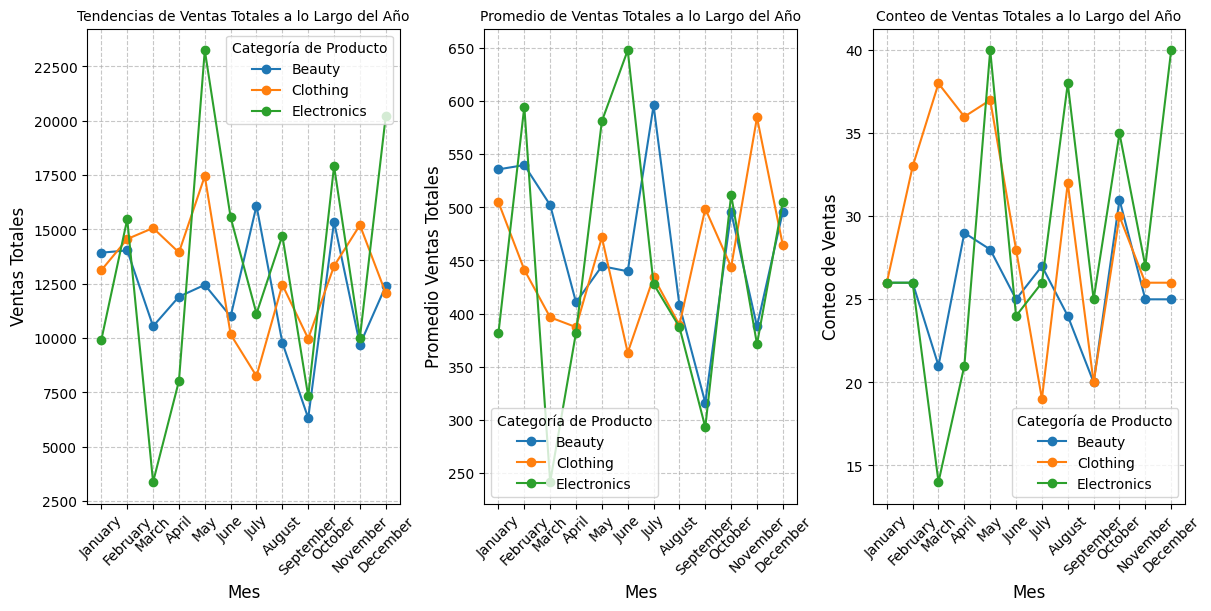

In [139]:
# Asegurarnos de que los meses están ordenados correctamente
month_order = ["January", "February", "March", "April", "May", "June",
               "July", "August", "September", "October", "November", "December"]
df['Month Name'] = pd.Categorical(df['Month Name'], categories=month_order, ordered=True)

# Agrupar y, sumar, promediar o contar ventas totales por mes y por categoría de producto
monthly_sales_sum = df.groupby(['Month Name', 'Product Category'])['Total Sales'].sum().unstack().reindex(month_order)
monthly_sales_mean = df.groupby(['Month Name', 'Product Category'])['Total Sales'].mean().unstack().reindex(month_order)
monthly_sales_count = df.groupby(['Month Name', 'Product Category'])['Total Sales'].count().unstack().reindex(month_order)

# Crear subgráficos
fig, axes = plt.subplots(1, 3, figsize=(12, 6), constrained_layout=True)

# Gráfico de tendencias de ventas totales por Product Category
for category in monthly_sales_sum.columns:
    axes[0].plot(monthly_sales_sum.index, monthly_sales_sum[category], marker='o', label=category)

axes[0].set_title("Tendencias de Ventas Totales a lo Largo del Año", fontsize=10)
axes[0].set_xlabel("Mes", fontsize=12)
axes[0].set_ylabel("Ventas Totales", fontsize=12)
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True, linestyle='--', alpha=0.7)
axes[0].legend(title="Categoría de Producto")

# Gráfico de promedios de ventas totales por Product Category
for category in monthly_sales_mean.columns:
    axes[1].plot(monthly_sales_mean.index, monthly_sales_mean[category], marker='o', label=category)

axes[1].set_title("Promedio de Ventas Totales a lo Largo del Año", fontsize=10)
axes[1].set_xlabel("Mes", fontsize=12)
axes[1].set_ylabel("Promedio Ventas Totales", fontsize=12)
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True, linestyle='--', alpha=0.7)
axes[1].legend(title="Categoría de Producto")

# Gráfico de conteo de ventas por Product Category
for category in monthly_sales_count.columns:
    axes[2].plot(monthly_sales_count.index, monthly_sales_count[category], marker='o', label=category)

axes[2].set_title("Conteo de Ventas Totales a lo Largo del Año", fontsize=10)
axes[2].set_xlabel("Mes", fontsize=12)
axes[2].set_ylabel("Conteo de Ventas", fontsize=12)
axes[2].tick_params(axis='x', rotation=45)
axes[2].grid(True, linestyle='--', alpha=0.7)
axes[2].legend(title="Categoría de Producto")

# Mostrar la figura
plt.show()



### *Análisis*
1. Si no se agrupan los datos por alguna medida, se estaría graficando un diagrama de dispersión pero con líneas que no dicen nada
2. Para darle el toque de la leyenda a los 3 gráficos de líneas para mirar tendencias de ventas a lo largo de los meses del año por suma de ventas, promedio de ventas o conteo de ventas, me ayudé de ChatGPT porque con matplotlib parece ser más complejo que con seaborn. Se graficaron así de seguido para observarlos y comparar de mejor forma que uno sobre o debajo de otro.
3. La categoría de electrónicos es la que tiene mayores picos de ventas comparados con las otras dos categorías de belleza y ropa, pero es esta última, la que tiene mayor cantidad de ventas entre febrero y mayo. En algunos casos, los picos altos de ventas totales, concuerdan con el promedio de ventas totales y a veces con la cantidad de ventas totales. Como la categoría electrónicos en febrero, ropa en mayo, belleza en julio. A simple vista se pudiera suponer que es la categoría electrónicos los que dan mayores ingresos, si hubieran algunos otros datos se podría saber también que tan rentable es la categoría


## d) Utiliza gráficos de dispersión para analizar la relación entre diferentes variables.


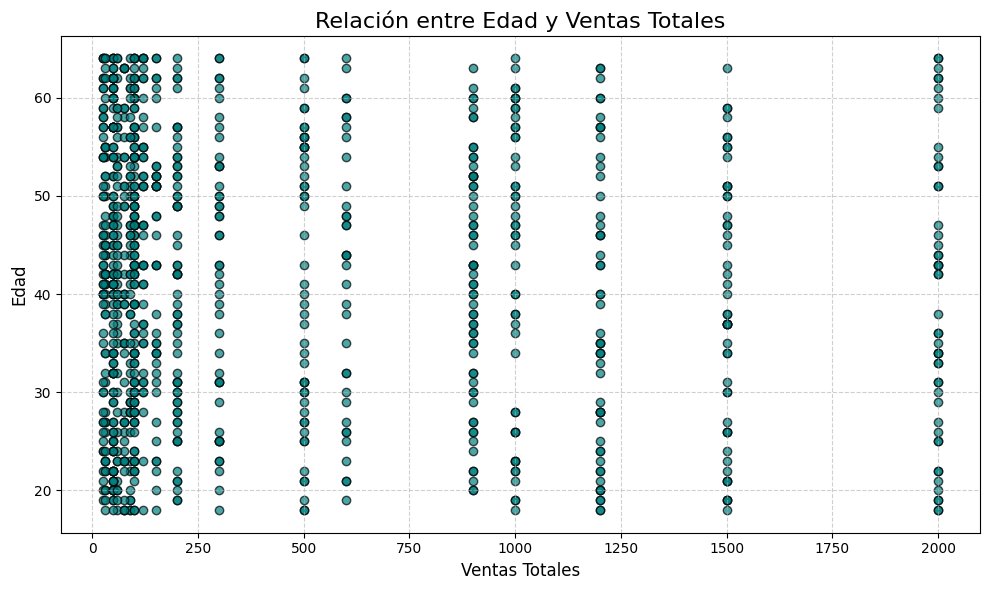

In [141]:
# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))

# Graficar Total Sales vs. Age
plt.scatter(df['Total Sales'], df['Age'], alpha=0.7, edgecolor='k', color='teal')

# Configurar etiquetas y título
plt.title("Relación entre Edad y Ventas Totales", fontsize=16)
plt.xlabel("Ventas Totales", fontsize=12)
plt.ylabel("Edad", fontsize=12)

# Mejorar la presentación del gráfico
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


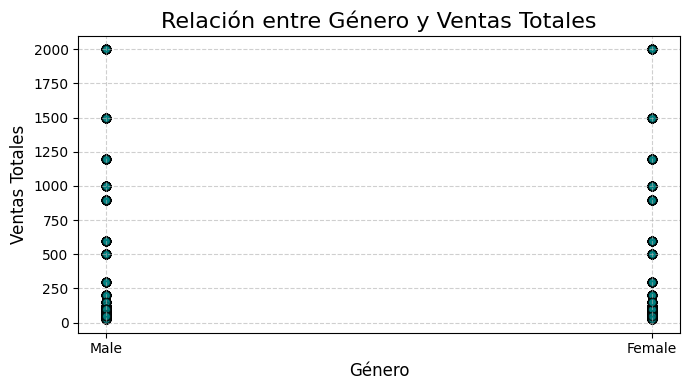

In [142]:
# Crear el gráfico de dispersión
plt.figure(figsize=(7, 4))

# Graficar Total Sales vs. Age
plt.scatter(df['Gender'], df['Total Sales'], alpha=0.7, edgecolor='k', color='teal')

# Configurar etiquetas y título
plt.title("Relación entre Género y Ventas Totales", fontsize=16)
plt.xlabel("Género", fontsize=12)
plt.ylabel("Ventas Totales", fontsize=12)

# Mejorar la presentación del gráfico
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

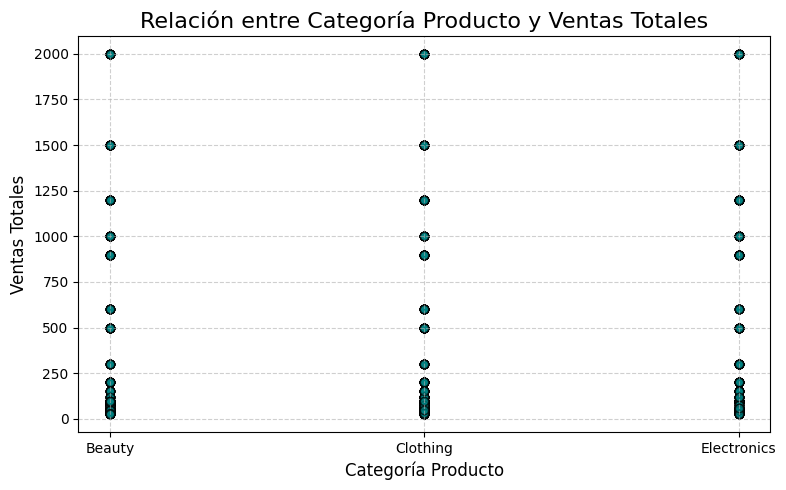

In [130]:
# Crear el gráfico de dispersión
plt.figure(figsize=(8, 5))

# Graficar Total Sales vs. Age
plt.scatter(df['Product Category'], df['Total Sales'], alpha=0.7, edgecolor='k', color='teal')

# Configurar etiquetas y título
plt.title("Relación entre Categoría Producto y Ventas Totales", fontsize=16)
plt.xlabel("Categoría Producto", fontsize=12)
plt.ylabel("Ventas Totales", fontsize=12)

# Mejorar la presentación del gráfico
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

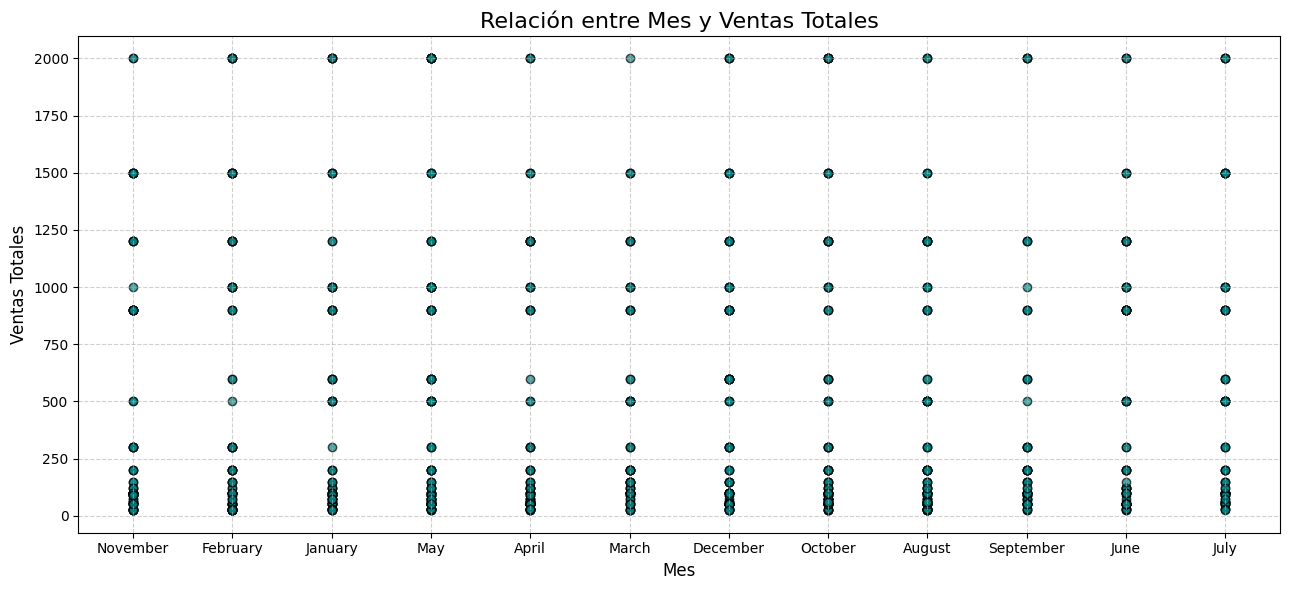

In [131]:
# Crear el gráfico de dispersión
plt.figure(figsize=(13, 6))

# Graficar Total Sales vs. Age
plt.scatter(df['Month Name'], df['Total Sales'], alpha=0.7, edgecolor='k', color='teal')

# Configurar etiquetas y título
plt.title("Relación entre Mes y Ventas Totales", fontsize=16)
plt.xlabel("Mes", fontsize=12)
plt.ylabel("Ventas Totales", fontsize=12)

# Mejorar la presentación del gráfico
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

### *Análisis*
1. Como se observó en histogramas anteriores, la mayor concentración de los puntos o datos u observaciones está por debajo de los 250 dólares, llama la atención que hay ventas puntuales de 1500 y ya de 2000, no hay ventas al interior de este rango, solo en los extremos. En el primer gráfico no es posible observar si hay alguna diferencia en edad, como si en x rango de edad hay más ventas de tal valor, ya que todo está bastante distribuido en el gráfico de dispersión.
2. Algo similar ocurre cuando se cambia edad por género, exactamente igual al anterior párrafo, los mismos espacios en blanco y la misma distribución del género a través de las ventas totales sin algún patrón distintivo o diferente. Esto ayuda a corroborar que, estas dos variables dan, por un lado información similar (o igual, ósea es lo mismo organizar los datos por edad o por género), pero también que en algún modelado o análisis de algún tipo, probablemente el uso de estas variables no sea de mucha utilidad.
3. En cuanto a categoría de productos y meses, estos gráficos no son muy dicientes, como lo pudieron ser los de líneas o como lo serán los próximos.


## e) Combina histogramas y boxplots para visualizar la distribución de las ventas y detectar valores atípicos.

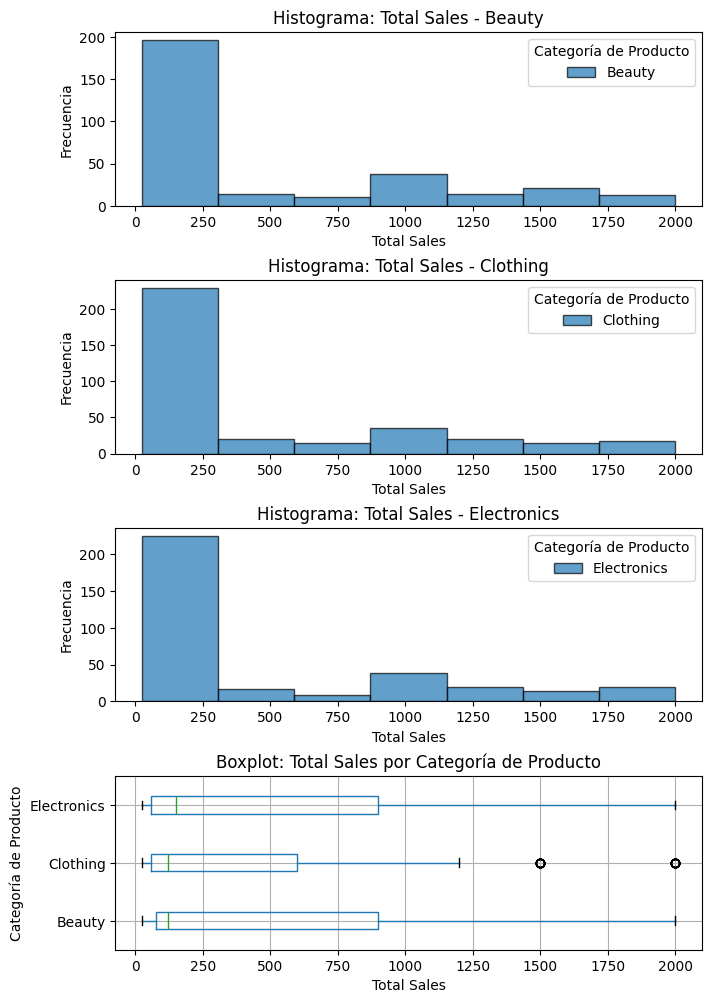

In [132]:
# Crear subgráficos (3 filas para histogramas y 1 para boxplot)
fig, axes = plt.subplots(4, 1, figsize=(7, 10), constrained_layout=True)

# Obtener las categorías únicas de Producto
categories = df['Product Category'].unique()

# Generar un histograma para cada categoría
for i, category in enumerate(categories):
    axes[i].hist(df[df['Product Category'] == category]['Total Sales'],
                 bins=7, alpha=0.7, label=category, edgecolor='black')
    axes[i].set_title(f"Histograma: Total Sales - {category}")
    axes[i].set_xlabel("Total Sales")
    axes[i].set_ylabel("Frecuencia")
    axes[i].legend(title="Categoría de Producto")

# Boxplot en el último subplot
df.boxplot(column='Total Sales', by='Product Category', vert=False, ax=axes[-1])
axes[-1].set_title("Boxplot: Total Sales por Categoría de Producto")
axes[-1].set_xlabel("Total Sales")
axes[-1].set_ylabel("Categoría de Producto")

# Eliminar el título automático generado por 'by' en el boxplot
plt.suptitle('')  # Eliminar el título por defecto generado por pandas

# Mostrar la figura
plt.show()


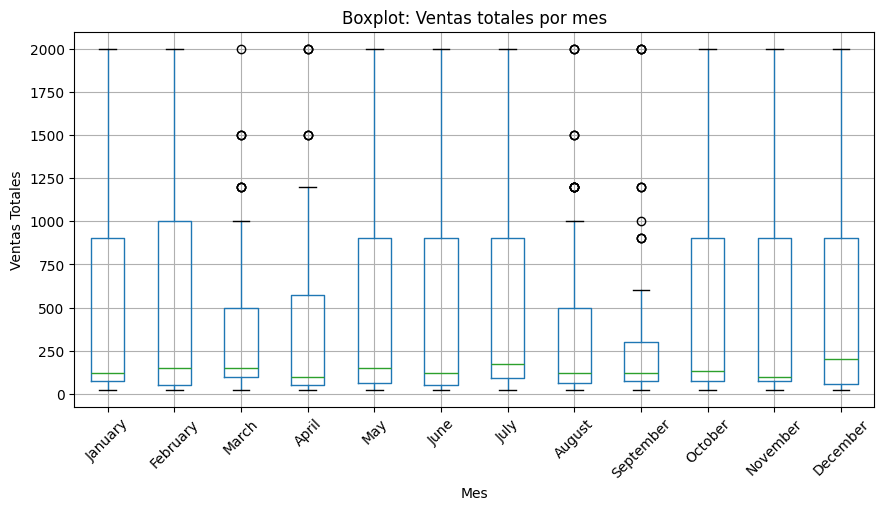

In [133]:
# Como solo veo que hay un año de datos, sería interesante revisar las ventas en los meses con un boxplot, ya que adelante se vería la variación en una línea
# Debí organizar los meses para poder graficarlos en orden, ya que con la otra columna que está en el dataset no fui capaz de organizarlo
month_order = ["January", "February", "March", "April", "May", "June",
               "July", "August", "September", "October", "November", "December"]
df['Month Name'] = pd.Categorical(df['Month Name'], categories=month_order, ordered=True)
df = df.sort_values('Month Name')

fig, ax = plt.subplots(figsize=(10, 5))  # Cambiar el tamaño del gráfico

# Crear el boxplot
df.boxplot(column='Total Sales', by='Month Name', vert=True, ax=ax)

# Añadir título y etiquetas
ax.set_title("Boxplot: Ventas totales por mes")
ax.set_xlabel("Mes")
ax.set_ylabel("Ventas Totales")
plt.suptitle('')  # Eliminar el título por defecto generado por 'by'

# Rotar las etiquetas del eje X
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

### *Análisis*
1. Al revisar los histogramas total de ventas por cada una de las categorías por separado, se puede apreciar que no hay muchas diferencias y que cumplen un mismo patrón que veníamos observando desde arriba, la mayor concentración de los datos se da por debajo de los 250 dólares, con otro pico alrededor de los 1.000 dólares.
2. Al revisar el boxplot, es notorio que la categoría electrónicos tiene una mediana un poco superior a la de las otras dos categorías (pero aún por debajo de los 250 dólares), que en todas las categorías hay ventas de hasta 2.000 dólares, pero este valor es el máximo según los boxplot, para las categorías electrónicos y belleza, ya que para la categoría ropa el máximo estaría entre 1.000 y 1.250, presentando a su vez dos datos atípicos, uno alrededor de 1.500 y otro alrededor de 2.000. Si bien son atípicos, es notorio que los datos en la categoría ropa están más compactos o no están tan distribuidos o dispersos (según el tamaño de las barras de la caja) comparados con la categoría belleza o electrónicos.
3. Algo similar a lo anterior sucede cuando se ven las ventas totales por meses, las medianas están muy parejas (a excepción del mes de noviembre, que parece ser el menor). Pero en todos los meses hubieron ventas totales de hasta 2.000 dólares, con excepción de que en marzo, abril, agosto y septiembre, estos datos fueron atípicos, incluso en septiembre el q3 y la concentración de los datos estuvo cercana a los 250 dólares, lo cual podría suponer un mes con pocas ventas. Esto anterior se confirma con lo visto en los gráficos de líneas, donde en el mes de noviembre las ventas totales y el promedio de estas cae en las categorías de ropa y electrónicos, incluso la cantidad de ventas cae en las tres categorías. En casos reales, este tipo de análisis serviría para revisar por ejemplo si sucedió algo en el sitio o en el sistema o algún evento de algún tipo que generara dicha caída en las ventas.


# **3) Generar un Pull Request en GitHub**
Después de completar el análisis y las visualizaciones, sube los cambios a una nueva rama en tu repositorio de GitHub y genera un Pull Request (PR) para revisión.

Después reviso con más tiempo y calma bien este punto, más de que, desde el prebootcamp algunas cosas no me funcionaban o no me daban en GIT